# Importar librerías

In [100]:
import pandas as pd
import datetime as dt

# Re-castear los datos de fecha

In [159]:
df = pd.read_csv("data/incidentes-viales-c5-limpio.csv", sep="$", index_col = 0)
df.reset_index(inplace = True, drop = True)

In [160]:
conversion = {"fecha_hora_cierre": "datetime64[ns]", "fecha_hora_creacion": "datetime64[ns]"}
df = df.astype(conversion)

df["fecha_hora_creacion"] = df["fecha_hora_creacion"].dt.strftime("%y-%m-%d %H:%M:%S")
df["fecha_hora_cierre"] = df["fecha_hora_cierre"].dt.strftime("%y-%m-%d %H:%M:%S")

df["fecha_hora_creacion"] = pd.to_datetime(df["fecha_hora_creacion"])
df["fecha_hora_cierre"] = pd.to_datetime(df["fecha_hora_cierre"])

## ¿Qué tan letales son los accidentes automovilísticos?
#### Parámetro: datos que reporten cadáveres / cantidad de reportes totales por mes

In [170]:
series_muertos = df[df["incidente_c4"].str.contains("cadáver")].groupby(pd.Grouper(key='fecha_hora_creacion', freq='M')).count()["incidente_c4"]
series_total = df.groupby(pd.Grouper(key='fecha_hora_creacion', freq='M')).count()["incidente_c4"]

letalidad_mensual = series_muertos * 100 / series_total

letalidad_mensual = letalidad_mensual[['2017-01-31', '2017-02-28', '2017-03-31',
               '2017-04-30', '2017-05-31', '2017-06-30', '2017-07-31',
               '2017-08-31', '2017-09-30', '2017-10-31', '2017-11-30',
               '2017-12-31', '2018-01-31', '2018-02-28', '2018-03-31',
               '2018-04-30', '2018-05-31', '2018-06-30', '2018-07-31',
               '2018-08-31', '2018-09-30', '2018-10-31', '2018-11-30',
               '2018-12-31', '2019-01-31', '2019-02-28', '2019-03-31',
               '2019-04-30', '2019-05-31', '2019-06-30', '2019-07-31',
               '2019-08-31', '2019-09-30', '2019-10-31', '2019-11-30',
               '2019-12-31', '2020-01-31', '2020-02-29', '2020-03-31',
               '2020-04-30', '2020-05-31', '2020-06-30', '2020-07-31',
               '2020-08-31', '2020-09-30', '2020-10-31', '2020-11-30',
               '2020-12-31', '2021-01-31', '2021-02-28']]

In [171]:
print(letalidad_mensual)

fecha_hora_creacion
2017-01-31    0.302419
2017-02-28    0.292398
2017-03-31    0.560748
2017-04-30    0.358423
2017-05-31    0.311203
2017-06-30    0.395257
2017-07-31    0.240674
2017-08-31    0.086580
2017-09-30    0.000000
2017-10-31    0.330579
2017-11-30    0.251678
2017-12-31    0.000000
2018-01-31    0.297915
2018-02-28    0.229008
2018-03-31    0.500626
2018-04-30    0.249066
2018-05-31    0.275482
2018-06-30    0.103734
2018-07-31    0.107411
2018-08-31    0.084674
2018-09-30    0.186047
2018-10-31    0.088810
2018-11-30    0.641711
2018-12-31    0.244798
2019-01-31    0.098814
2019-02-28    0.399680
2019-03-31    0.360577
2019-04-30    0.399467
2019-05-31    0.264784
2019-06-30    0.000000
2019-07-31    0.103093
2019-08-31    0.298507
2019-09-30    0.106157
2019-10-31    0.163666
2019-11-30    0.000000
2019-12-31    0.243309
2020-01-31    0.692384
2020-02-29    0.441176
2020-03-31    0.351288
2020-04-30    0.462963
2020-05-31    0.192308
2020-06-30    0.219539
2020-07-31    

<AxesSubplot:xlabel='fecha_hora_creacion'>

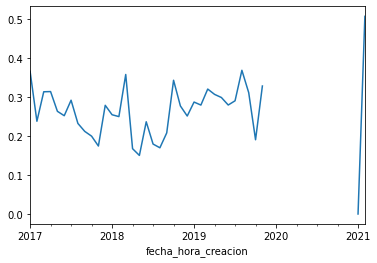

In [151]:
letalidad_mensual.plot()

##### Conclusión
A través de los 3 años (2017 a 2019) se va visto una letalidad que oscila entre 0.15 % y 0.37 %

## ¿La pandemia ha influido en la ocurrencia de los incidentes?
#### ¿Qué tan letal ha sido?

##### Conclusión
Dado a que se perdieron los datos de todo 2020 y primeros del 2021, no se puede responder con certeza el efecto de la pandemia sobre los incidentes.

## ¿Qué tipos de accidentes son más comunes?

In [169]:
df.groupby(by="incidente_c4").count()["fecha_hora_creacion"].sort_values(ascending=False)

incidente_c4
accidente-choque sin lesionados                  227757
accidente-choque con lesionados                   72114
lesionado-atropellado                             36245
accidente-motociclista                            21686
accidente-volcadura                                4777
accidente-persona atrapada / desbarrancada         2274
accidente-vehiculo atrapado                         831
accidente-otros                                     684
cadáver-atropellado                                 582
accidente-ciclista                                  524
accidente-choque con prensados                      461
cadáver-accidente automovilístico                   406
sismo-choque sin lesionados                         256
accidente-vehiculo desbarrancado                    214
accidente-vehículo atrapado-varado                  168
detención ciudadana-atropellado                     131
sismo-choque con lesionados                          83
detención ciudadana-accidente autom

#### Conclusión
Afortunadamente, la mayoría de los incidentes automovilísticos son choques sin lesionados

In [139]:
incidentes_totales = df.groupby([df['fecha_hora_creacion'].dt.year, df['fecha_hora_creacion'].dt.month]).agg({'incidente_c4':"count"})

array([<AxesSubplot:title={'center':'(incidente_c4, 2016)'}, xlabel='fecha_hora_creacion'>,
       <AxesSubplot:title={'center':'(incidente_c4, 2017)'}, xlabel='fecha_hora_creacion'>,
       <AxesSubplot:title={'center':'(incidente_c4, 2018)'}, xlabel='fecha_hora_creacion'>,
       <AxesSubplot:title={'center':'(incidente_c4, 2019)'}, xlabel='fecha_hora_creacion'>,
       <AxesSubplot:title={'center':'(incidente_c4, 2021)'}, xlabel='fecha_hora_creacion'>],
      dtype=object)

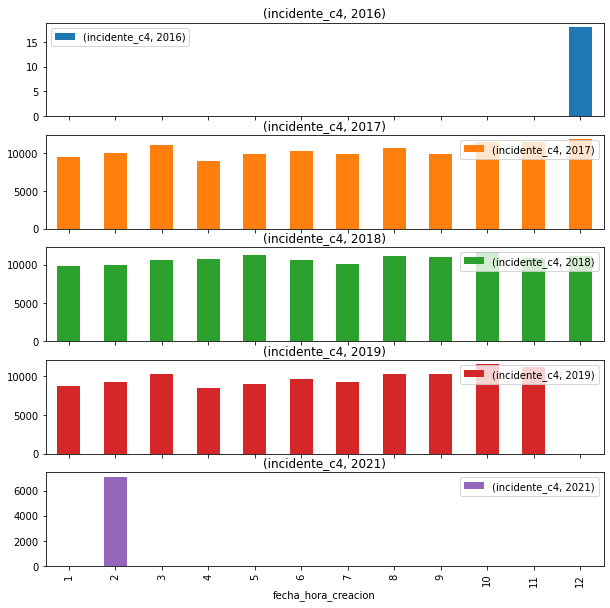

In [142]:
incidentes_totales.unstack(level=0).plot(kind='bar', subplots=True, figsize = (10,10))